In [1]:
#General Import
import pandas as pd
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from IPython.display import Image  

#import pydotplus as pydot
from sklearn import tree
from os import system
import pandas_profiling


In [2]:
df = pd.read_csv("bank-full.csv") #read the file
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.head(10) #print first 10 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info() #checking the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.dtypes #datatype 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [9]:
df.describe().T  #dataframe describe

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
df.nunique() #unique values

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

## Value Counts

In [11]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [12]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [14]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [15]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [16]:
df["balance"].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [17]:
df["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [18]:
df["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [19]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [20]:
df["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [21]:
df["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [22]:
df["duration"].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [23]:
df["campaign"].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [24]:
df["pdays"].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [25]:
df["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [26]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [27]:
df["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [28]:
df.isnull().sum().sum() #Total Number of missing values in  dataframe

0

In [29]:
##Identify duplicates records in the data
dupes = df.duplicated()
sum(dupes)

0

## Univariate Analysis

In [30]:
df1=df[["age","balance","day","duration","campaign","pdays","previous"]]
df1

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


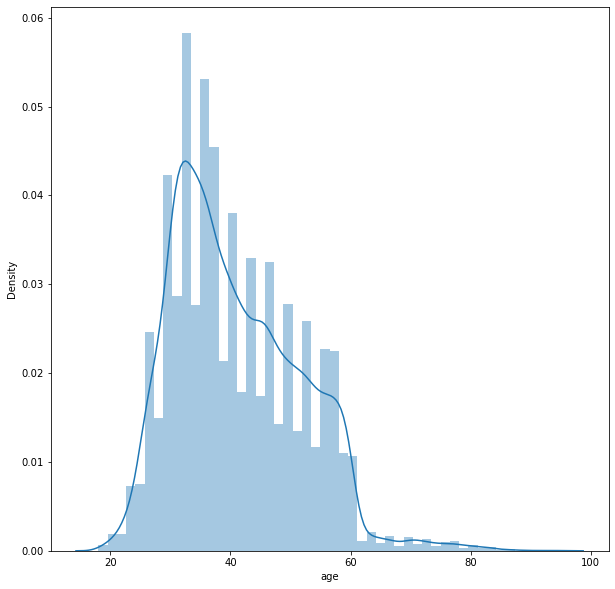

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


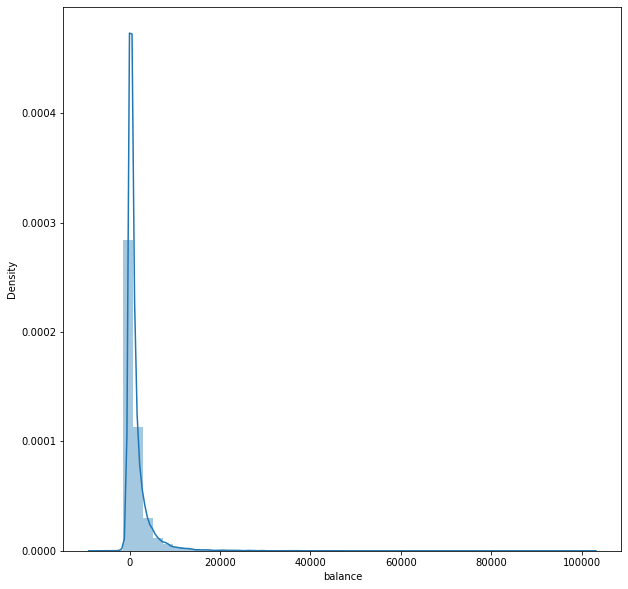

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


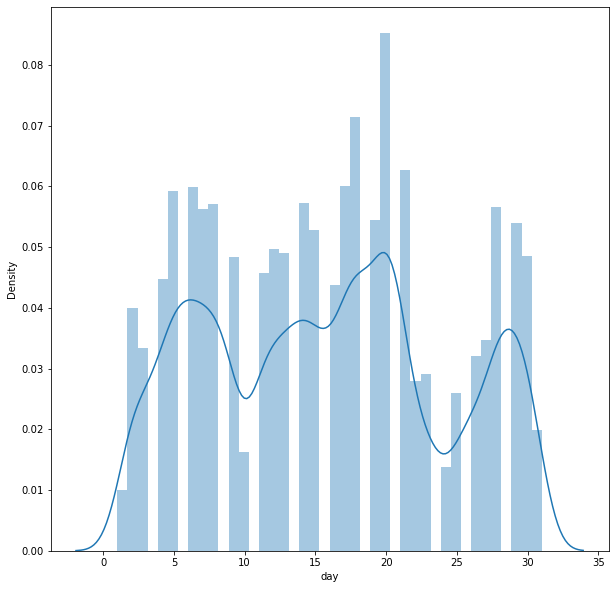

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


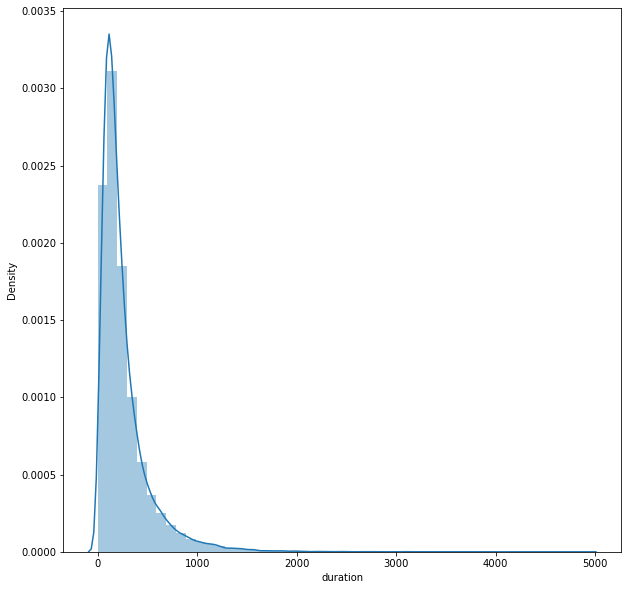

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


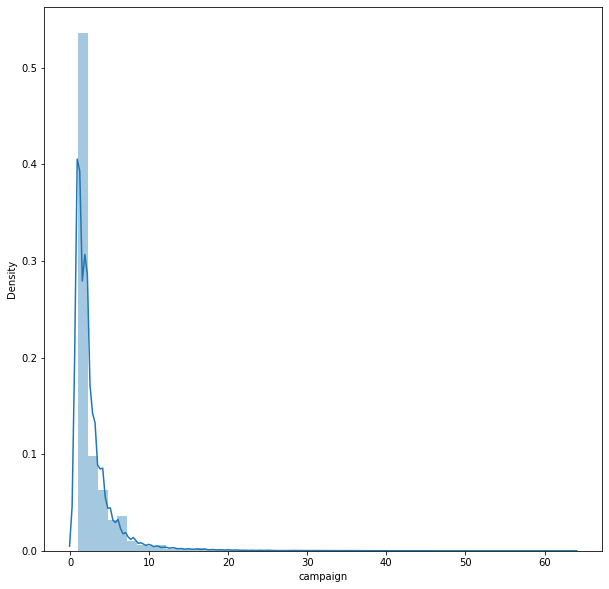

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


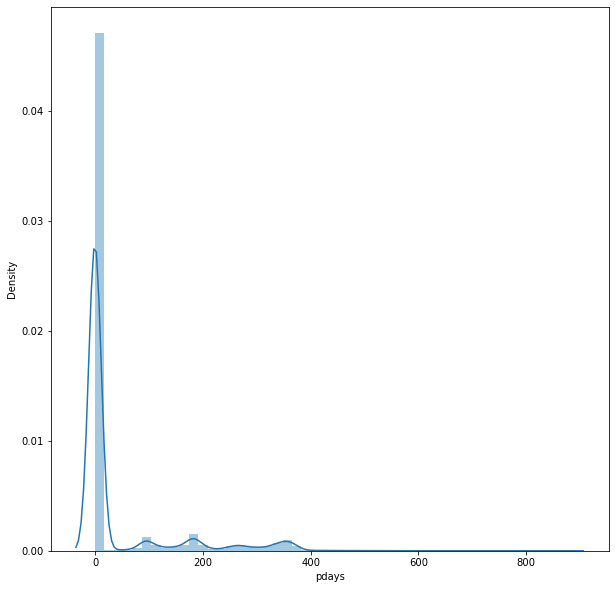

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


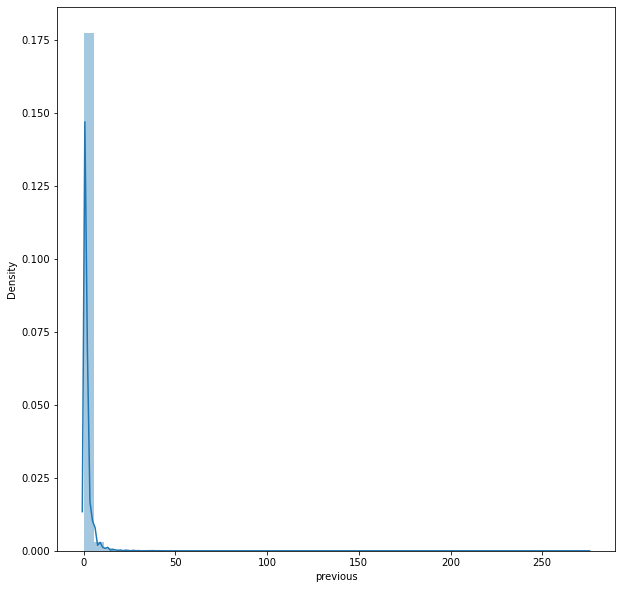

In [31]:
#univariate
# let us plot all the columns to look at their distributions

for i in df1.columns:
    plt.figure(figsize = (10,10))
    sns.distplot(df1[i])
    plt.show()

## Multivariate Analysis

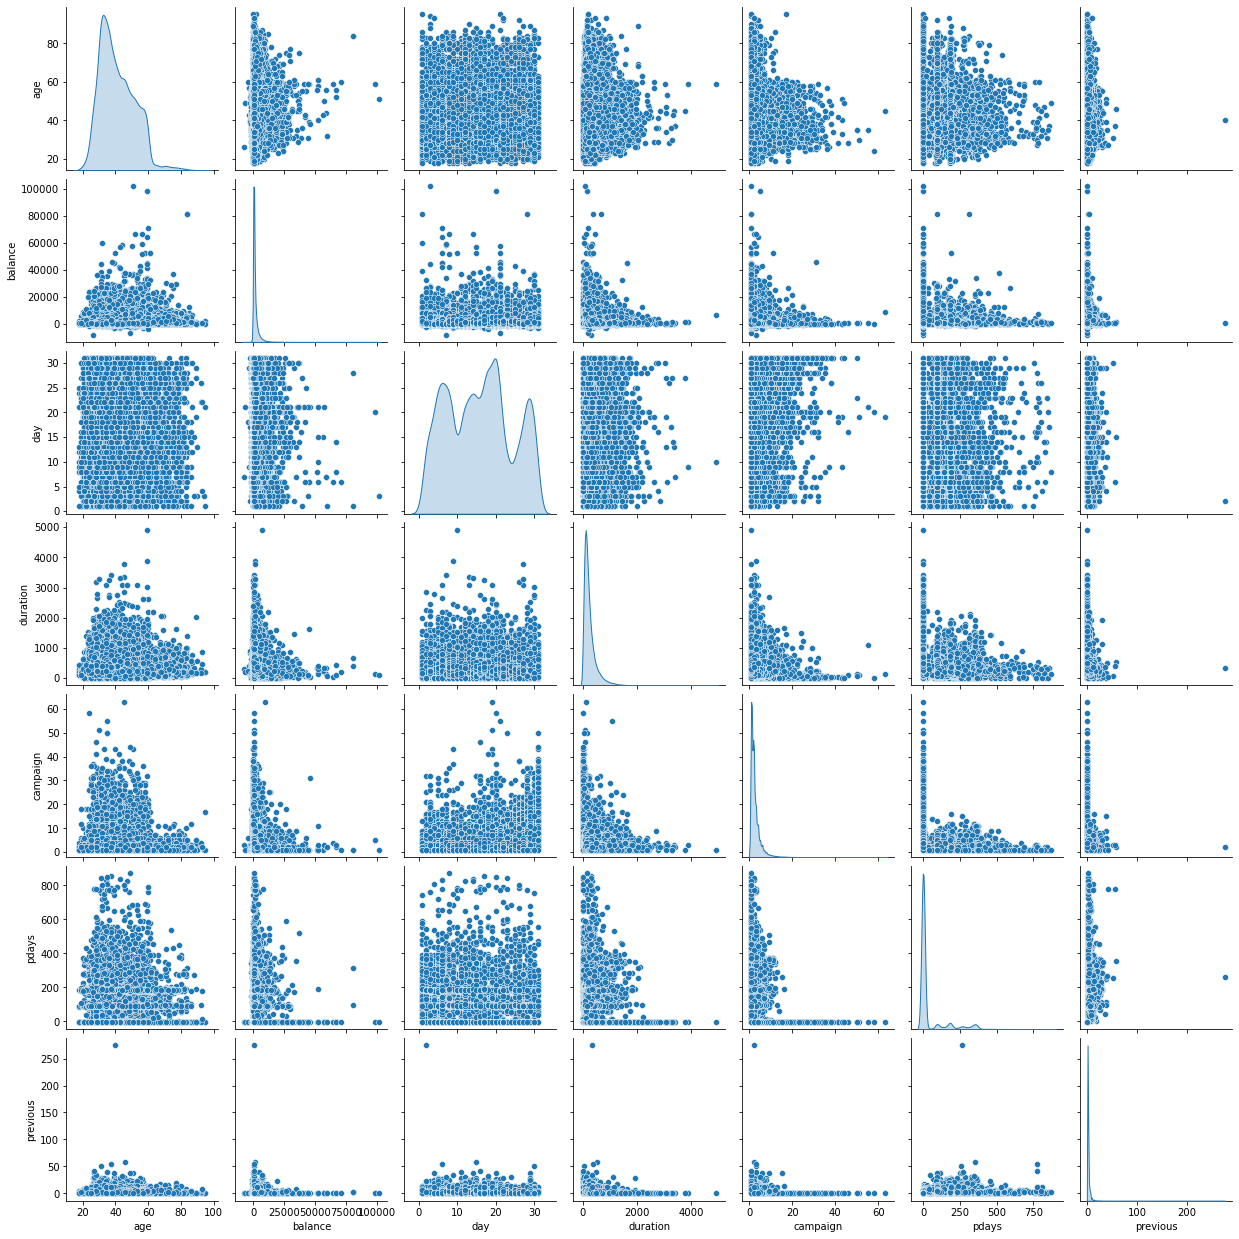

In [32]:
#bivariate
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram on the diag

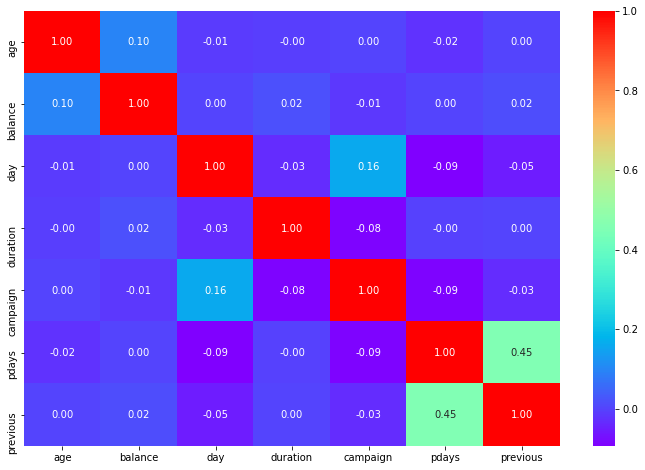

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow', ) #heatmap
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


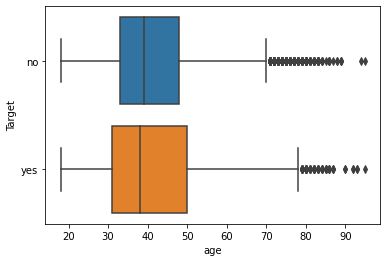

In [34]:
sns.boxplot(df['age'], df['Target']); #boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


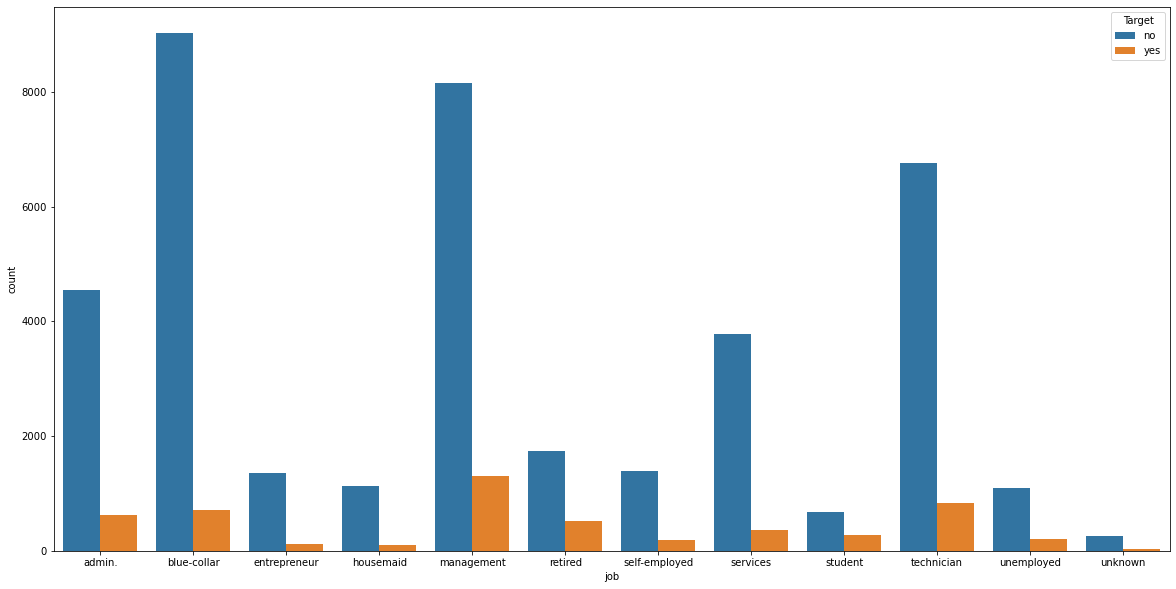

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(df['job'],hue=df['Target']);
plt.show()

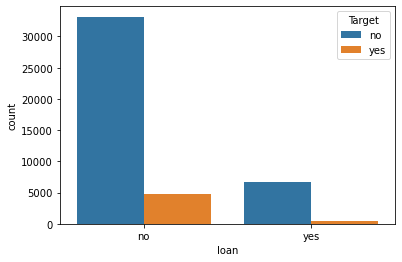

In [36]:

sns.countplot(df['loan'],hue=df['Target']);


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


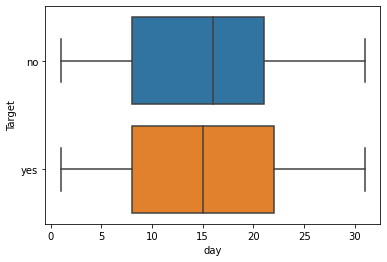

In [37]:

sns.boxplot(df['day'],df['Target']);


## Dealing with outliers

In [38]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [39]:
np.where((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

(array([   34,    37,    43, ..., 45208, 45210, 45210], dtype=int64),
 array([1, 3, 3, ..., 6, 5, 6], dtype=int64))

In [40]:
df1_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
df1_out.shape

(28193, 7)

In [41]:
df3 = df1.copy()

In [42]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df3 < Q1 - 1.5 * IQR)[0], np.where(df3 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df3.iloc[i,j] = whisker[j]

    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df3 > Q3 + 1.5 * IQR)[0], np.where(df3 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df3.iloc[i,j] = whisker[j]

In [43]:
df3.shape, df1.shape

((45211, 7), (45211, 7))

In [44]:
df4=df[['education','job','marital','housing','loan','default','contact','month','poutcome','Target']]
df4

,education,job,marital,housing,loan,default,contact,month,poutcome,Target
0,tertiary,management,married,yes,no,no,unknown,may,unknown,no
1,secondary,technician,single,yes,no,no,unknown,may,unknown,no
2,secondary,entrepreneur,married,yes,yes,no,unknown,may,unknown,no
3,unknown,blue-collar,married,yes,no,no,unknown,may,unknown,no
4,unknown,unknown,single,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,tertiary,technician,married,no,no,no,cellular,nov,unknown,yes
45207,primary,retired,divorced,no,no,no,cellular,nov,unknown,yes
45208,secondary,retired,married,no,no,no,cellular,nov,success,yes
45209,secondary,blue-collar,married,no,no,no,telephone,nov,unknown,no


In [45]:
df3=df3.join(df4,how='left')

## Prepare the data for analytics

In [46]:
df3

,age,balance,day,duration,campaign,pdays,previous,education,job,marital,housing,loan,default,contact,month,poutcome,Target
0,58.0,2143.0,5,261.0,1.0,-1.0,0.0,tertiary,management,married,yes,no,no,unknown,may,unknown,no
1,44.0,29.0,5,151.0,1.0,-1.0,0.0,secondary,technician,single,yes,no,no,unknown,may,unknown,no
2,33.0,2.0,5,76.0,1.0,-1.0,0.0,secondary,entrepreneur,married,yes,yes,no,unknown,may,unknown,no
3,47.0,1506.0,5,92.0,1.0,-1.0,0.0,unknown,blue-collar,married,yes,no,no,unknown,may,unknown,no
4,33.0,1.0,5,198.0,1.0,-1.0,0.0,unknown,unknown,single,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825.0,17,643.0,3.0,-1.0,0.0,tertiary,technician,married,no,no,no,cellular,nov,unknown,yes
45207,70.5,1729.0,17,456.0,2.0,-1.0,0.0,primary,retired,divorced,no,no,no,cellular,nov,unknown,yes
45208,70.5,3462.0,17,643.0,5.0,-1.0,0.0,secondary,retired,married,no,no,no,cellular,nov,success,yes
45209,57.0,668.0,17,508.0,4.0,-1.0,0.0,secondary,blue-collar,married,no,no,no,telephone,nov,unknown,no


In [47]:
df3.dtypes

age           float64
balance       float64
day             int64
duration      float64
campaign      float64
pdays         float64
previous      float64
education    category
job          category
marital      category
housing      category
loan         category
default      category
contact      category
month        category
poutcome     category
Target       category
dtype: object

In [48]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [49]:
replaceStruct = {
                "housing": {"no": 0, "yes":1},  
                "loan"   : {"no": 0, "yes":1},
                "Target" : {"no": 0, "yes":1},
                "default": {"no": 0, "yes":1} 
                    }
oneHotCols=["job","marital","contact","education","month"]


In [50]:
df3=df3.drop("poutcome",axis=1)
df3=df3.replace(replaceStruct)
df3=pd.get_dummies(df3, columns=oneHotCols)
df3.head(10)


,age,balance,day,duration,campaign,pdays,previous,housing,loan,default,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,2143.0,5,261.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44.0,29.0,5,151.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33.0,2.0,5,76.0,1.0,-1.0,0.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,47.0,1506.0,5,92.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33.0,1.0,5,198.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,35.0,231.0,5,139.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,28.0,447.0,5,217.0,1.0,-1.0,0.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
7,42.0,2.0,5,380.0,1.0,-1.0,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
8,58.0,121.0,5,50.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,43.0,593.0,5,55.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
df3.dtypes

age                    float64
balance                float64
day                      int64
duration               float64
campaign               float64
pdays                  float64
previous               float64
housing                  int64
loan                     int64
default                  int64
Target                   int64
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
contact_cellular         uint8
contact_telephone        uint8
contact_unknown          uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
educatio

In [52]:
X = df3.drop("Target" , axis=1)
Y =df3['Target']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

x_train.head()

,age,balance,day,duration,campaign,pdays,previous,housing,loan,default,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
4095,44.0,-1249.0,19,83.0,4.0,-1.0,0.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
5140,38.0,745.0,21,281.0,6.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12826,27.0,221.0,7,554.0,1.0,-1.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4134,40.0,3444.0,19,643.0,4.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
40261,33.0,3335.0,15,92.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Split data into 70:30 

In [54]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df3.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df3.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## Logistic  regression

In [55]:
#logistic regression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',random_state=10,max_iter=10000)
logreg.fit(x_train, y_train)                    # fit the model on train data

LogisticRegression(max_iter=10000, random_state=10)

In [56]:
y_predict = logreg.predict(x_test)    #predicted y

In [57]:
z = x_test.copy()
z['Observed Target'] = y_test
z['Predicted Target'] = y_predict
z.tail()

,age,balance,day,duration,campaign,pdays,previous,housing,loan,default,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Observed Target,Predicted Target
11098,37.0,1736.0,18,66.0,1.0,-1.0,0.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5665,40.0,-426.0,26,245.0,1.0,-1.0,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
15431,26.0,0.0,18,142.0,1.0,-1.0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
40379,58.0,3462.0,23,643.0,4.0,-1.0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
26060,54.0,277.0,19,300.0,5.0,-1.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8924068632097829

Testing accuracy 0.8904452963727514

Confusion Matrix


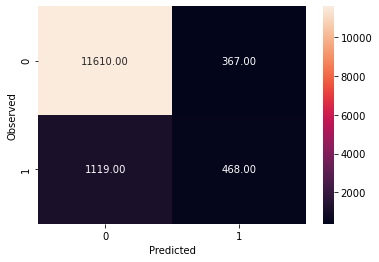

None

Recall: 0.2948960302457467

Precision: 0.5604790419161677

F1 Score: 0.3864574731626754

Roc Auc Score: 0.6321269831449156


In [59]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

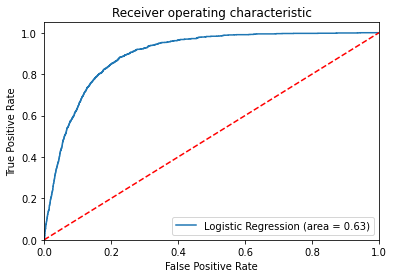

In [60]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [61]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
27,contact_unknown,1.51
39,month_mar,1.36
5,pdays,1.13
36,month_jan,1.13
41,month_nov,1.12
42,month_oct,1.06
37,month_jul,1.04
43,month_sep,0.99
33,month_aug,0.92
7,housing,0.70


Months,contact,housing and education influecing the models output.

## Decision Tree Classifier

In [62]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [63]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))



1.0
0.864420524918903


In [64]:
train_char_label = ['No', 'Yes']
Target_Tree_File = open('target_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Target_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Target_Tree_File.close()

In [65]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng target_tree.dot -o target_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("target_tree.png"))

    

system command returning error: 1


In [66]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.8885834360286915
0.8886021822471247


In [67]:
train_char_label = ['No', 'Yes']
Target_Tree_FileR = open('target_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Target_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Target_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng target_treeR.dot -o target_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("target_treeR.png"))



system command returning error: 1


In [68]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                          Imp
age                  0.000000
balance              0.000000
day                  0.000000
duration             0.814971
campaign             0.000000
pdays                0.000000
previous             0.000000
housing              0.122902
loan                 0.000000
default              0.000000
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_divorced     0.000000
marital_married      0.000000
marital_single       0.000000
contact_cellular     0.000000
contact_telephone    0.000000
contact_unknown      0.028035
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
month_apr 

0.8886021822471247


<AxesSubplot:>

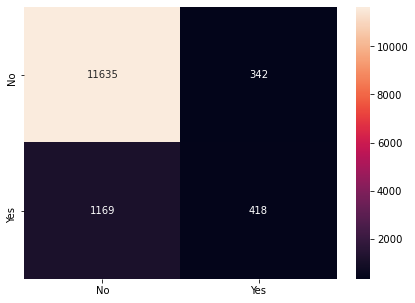

In [69]:
print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


## Ensemble models Bagging

In [70]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)


0.8930993807136538


<AxesSubplot:>

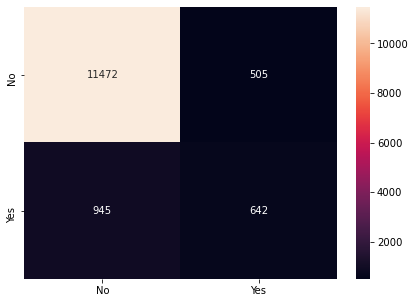

In [71]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



## Ensemble models Adaboost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)


0.8891182542023002


<AxesSubplot:>

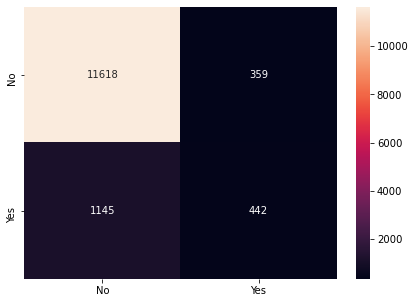

In [73]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



##  Ensemble Learning - GradientBoost

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)


0.8946475965791801


<AxesSubplot:>

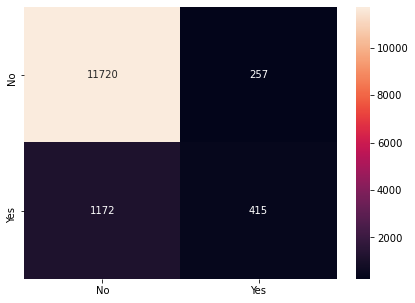

In [75]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble RandomForest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)


0.8961958124447066


<AxesSubplot:>

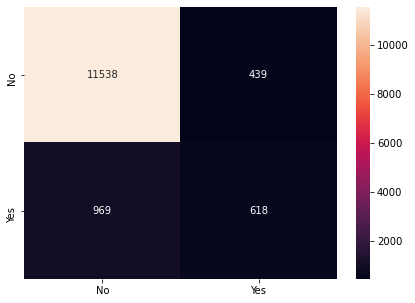

In [77]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

1.The accuracy doesn't improved in great after  the ensemble technique though the model improved a bit
